# Employer Review Prediction
## Reynara Ezra Pratama

## Background

## Business Understanding

1. Mengetahui *review* yang diberikan oleh pegawai terhadap perusahaan.
2. Memprediksi *review* yang diberikan dan mengkategorikannya ke dalam *review* yang bersifat positif, netral, atau negatif.

## Data Understanding

1. `ReviewTitle` : Topik dari *review*.
2. `CompleteReview` : *Review* yang diberikan pegawai perusahaan.
3. `URL` : *Uniform Resource Locator*.
4. `Rating` : Penilaian yang diberikan pegawai perusahaan.
5. `ReviewDetails` : Detail mengenai *review*.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import tensorflow as tf
import nltk

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings 
warnings.filterwarnings('ignore')

## Loading Dataset

**Load Data From Github**

In [2]:
url = "https://raw.githubusercontent.com/ReynaraEzra/Employer-Review/main/data_input/results.json"
df = pd.read_json(url)

**Load Data From Local File**

In [3]:
# df = pd.read_json('data_input/results.json')

## Checking Dataset

In [4]:
df.head()

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails
0,Productive,"Good company, cool workplace, work load little...",https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Current Employee) - Ghansoli - August 30,..."
1,Stressful,1. Need to work on boss's whims and fancies 2....,https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Former Employee) - - August 26, 2021"
2,Good Company for Every employee,"Good company for every Engineers dream, Full M...",https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Former Employee) - - August 17, 2021"
3,Productive,I am just pass out bsc in chemistry Typical da...,https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Current Employee) - - August 17, 2021"
4,Non productive,Not so fun at work just blame games Target pe...,https://in.indeed.com/cmp/Reliance-Industries-...,1,"(Former Employee) - - August 9, 2021"


In [5]:
df.tail()

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails
145204,Definitely very good place to work and can hav...,We get a lot to learn in the company. Very sys...,https://in.indeed.com/cmp/Tata-Consultancy-Ser...,4,"(Former Employee) - - January 20, 2012"
145205,IT Services Company; Great scope for improvement.,Lot of scope to learn different technologies u...,https://in.indeed.com/cmp/Tata-Consultancy-Ser...,4,"(Former Employee) - - January 19, 2012"
145206,"Productive, fun to work, great place to do cer...","An overall positive experience, nice environme...",https://in.indeed.com/cmp/Tata-Consultancy-Ser...,4,"(Former Employee) - - January 19, 2012"
145207,Great place to start the career.,Happy that I've started my career from such a ...,https://in.indeed.com/cmp/Tata-Consultancy-Ser...,3,"(Former Employee) - - January 7, 2012"
145208,Nice place to work,Got good experience and knowledge about my wor...,https://in.indeed.com/cmp/Tata-Consultancy-Ser...,5,"(Former Employee) - - December 19, 2011"


In [6]:
df.sample(5)

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails
103543,"Accounts, Secretarial and Administration","Handling Payroll related work, reporting, reco...",https://in.indeed.com/cmp/HSBC/reviews?start=2080,3,"(Current Employee) - - November 9, 2015"
107317,Place to work,I was recruited and got trained at Mysore camp...,https://in.indeed.com/cmp/Infosys/reviews?star...,5,"(Former Employee) - - September 29, 2017"
117192,Bank,To work in an error free environment and ensur...,https://in.indeed.com/cmp/Hdfc-Bank/reviews?st...,4,"(Current Employee) - - February 15, 2014"
102296,Making Automation to more production,I done my work everyday as very perfect. I'm ...,https://in.indeed.com/cmp/Dell-Technologies/re...,4,"(Current Employee) - - March 14, 2014"
126832,Good Learning experience,A typical day at work will have some status ca...,https://in.indeed.com/cmp/Infosys/reviews?star...,4,"(Former Employee) - - July 7, 2016"


## Check Characteristic Data

**Data Shape**

In [7]:
df.shape

(145209, 5)

**Data Columns**

In [8]:
df.columns

Index(['ReviewTitle', 'CompleteReview', 'URL', 'Rating', 'ReviewDetails'], dtype='object')

**Data Info**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145209 entries, 0 to 145208
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ReviewTitle     145209 non-null  object
 1   CompleteReview  145209 non-null  object
 2   URL             145209 non-null  object
 3   Rating          145209 non-null  int64 
 4   ReviewDetails   145209 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.5+ MB


**Descriptive Statistic**

In [10]:
df.describe()

,Rating
count,145209.000000
mean,4.053661
std,0.925805
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


**Check Missing Value**

In [11]:
df.isnull().sum()

ReviewTitle       0
CompleteReview    0
URL               0
Rating            0
ReviewDetails     0
dtype: int64

**Check and Drop Duplicate Data**

In [12]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop=True, inplace=True)

In [13]:
df.shape

(145191, 5)

## Feature Extraction

In [14]:
df.head(3)

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails
0,Productive,"Good company, cool workplace, work load little...",https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Current Employee) - Ghansoli - August 30,..."
1,Stressful,1. Need to work on boss's whims and fancies 2....,https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Former Employee) - - August 26, 2021"
2,Good Company for Every employee,"Good company for every Engineers dream, Full M...",https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Former Employee) - - August 17, 2021"


**Make Company Name Columns**

In [15]:
df['Company Name'] = df['URL'].str.split('/')
df['Company Name'] = df['Company Name'].str[4]

In [16]:
df['Company Name'].head()

0    Reliance-Industries-Ltd
1    Reliance-Industries-Ltd
2    Reliance-Industries-Ltd
3    Reliance-Industries-Ltd
4    Reliance-Industries-Ltd
Name: Company Name, dtype: object

In [17]:
df['Company Name'].unique()

array(['Reliance-Industries-Ltd', 'Mphasis', 'Kpmg', 'Yes-Bank',
       'Sutherland', 'Marriott-International,-Inc.', 'DHL', 'Jio',
       'Vodafoneziggo', 'HP', 'Maersk', 'Ride.swiggy', 'Jll', 'Alstom',
       'UnitedHealth-Group', 'Tata-Consultancy-Services-(tcs)',
       'Capgemini', 'Teleperformance', 'Cognizant-Technology-Solutions',
       'Mahindra-&-Mahindra-Ltd', 'L&T-Technology-Services-Ltd.',
       'Bharti-Airtel-Limited', 'Indeed', 'Hyatt',
       'Icici-Prudential-Life-Insurance', 'Accenture', 'Honeywell',
       'Standard-Chartered-Bank', 'Nokia', 'Apollo-Hospitals',
       'Tata-Aia-Life', 'Hdfc-Bank', 'Bosch', 'Deloitte', 'Ey',
       'Microsoft', 'Barclays', 'JPMorgan-Chase', 'Muthoot-Finance',
       'Wns-Global-Services', 'Kotak-Mahindra-Bank', 'Infosys', 'Oracle',
       "Byju's", 'Deutsche-Bank', 'Hinduja-Global-Solutions', 'Ericsson',
       'Axis-Bank', 'IBM', 'Concentrix', 'Wells-Fargo', 'Google',
       'Dell-Technologies', 'Facebook', 'Amazon.com', 'Flipkart.

In [18]:
df.head()

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails,Company Name
0,Productive,"Good company, cool workplace, work load little...",https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Current Employee) - Ghansoli - August 30,...",Reliance-Industries-Ltd
1,Stressful,1. Need to work on boss's whims and fancies 2....,https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Former Employee) - - August 26, 2021",Reliance-Industries-Ltd
2,Good Company for Every employee,"Good company for every Engineers dream, Full M...",https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Former Employee) - - August 17, 2021",Reliance-Industries-Ltd
3,Productive,I am just pass out bsc in chemistry Typical da...,https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Current Employee) - - August 17, 2021",Reliance-Industries-Ltd
4,Non productive,Not so fun at work just blame games Target pe...,https://in.indeed.com/cmp/Reliance-Industries-...,1,"(Former Employee) - - August 9, 2021",Reliance-Industries-Ltd


**Make Date Columns**

In [19]:
df['Date'] = df['ReviewDetails'].str.split('-', expand=True)[2]

In [20]:
df.head()

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails,Company Name,Date
0,Productive,"Good company, cool workplace, work load little...",https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Current Employee) - Ghansoli - August 30,...",Reliance-Industries-Ltd,"August 30, 2021"
1,Stressful,1. Need to work on boss's whims and fancies 2....,https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Former Employee) - - August 26, 2021",Reliance-Industries-Ltd,"August 26, 2021"
2,Good Company for Every employee,"Good company for every Engineers dream, Full M...",https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Former Employee) - - August 17, 2021",Reliance-Industries-Ltd,"August 17, 2021"
3,Productive,I am just pass out bsc in chemistry Typical da...,https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Current Employee) - - August 17, 2021",Reliance-Industries-Ltd,"August 17, 2021"
4,Non productive,Not so fun at work just blame games Target pe...,https://in.indeed.com/cmp/Reliance-Industries-...,1,"(Former Employee) - - August 9, 2021",Reliance-Industries-Ltd,"August 9, 2021"


**Make Year, Month, Day Columns**

In [21]:
df['Year'] = df['Date'].str.split(',', expand=True)[1]

In [22]:
df['Month'] = df['Date'].str.split(' ', expand=True)[2]

In [23]:
df['Day'] = df['Date'].str.split(' ', expand=True)[3]
df['Day'] = df['Day'].str.replace(',','')

**Check Columns**

Column `Year`

In [24]:
df['Year'].unique()

array([' 2021', ' 2020', ' 2019', ' 2018', ' 2017', ' 2016', None,
       ' 2015', ' 2014', ' 2013', ' 2012', ' 2011',
       ' GWAL PAHARI GURGAON  ', ' airoli  ', ' Malad west  ',
       ' Sp Infocity & Quadra ', ' New Delhi', ' Tamil nadu  ',
       'Gurgaon  '], dtype=object)

In [25]:
df['Year'] = df['Year'].str.replace(' ','')

In [26]:
df['Year'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', None, '2015',
       '2014', '2013', '2012', '2011', 'GWALPAHARIGURGAON', 'airoli',
       'Maladwest', 'SpInfocity&Quadra', 'NewDelhi', 'Tamilnadu',
       'Gurgaon'], dtype=object)

In [27]:
df['Year'].value_counts(sort=False)

2012                  4153
2016                 15295
2014                 15016
2018                 15782
2021                  2967
Tamilnadu                1
2020                 12674
2013                 11140
2011                    38
2015                 13664
NewDelhi                 1
Gurgaon                  1
GWALPAHARIGURGAON        1
2019                 16985
airoli                   1
Maladwest                1
SpInfocity&Quadra        1
2017                 37335
Name: Year, dtype: int64

In [28]:
df['Year'].isnull().sum()

135

In [29]:
valid_year = ['2011', '2012', '2013', '2014', '2014', '2015', 
               '2016', '2017', '2018', '2019', '2020', '2021']
df['Year'] = df['Year'].apply(lambda x:x if x in valid_year else np.nan)

In [30]:
df['Year'].value_counts()

2017    37335
2019    16985
2018    15782
2016    15295
2014    15016
2015    13664
2020    12674
2013    11140
2012     4153
2021     2967
2011       38
Name: Year, dtype: int64

In [31]:
df['Year'].isnull().sum()

142

Column `Month`

In [32]:
df['Month'].unique()

array(['August', 'July', 'September', 'May', 'June', 'April', 'March',
       'February', 'January', 'December', 'November', 'October', '',
       'Africa', 'bagh', 'Consultant', 'Road', '9', '.CLUSTER', '(west)',
       'West', 'PAHARI', 'mumbai', None, 'west', 'Ramannagar', 'West.',
       'Raman', 'park', 'Technohub', 'Solutions', 'Office', 'Estate',
       'Infocity', 'Nagar', 'Delhi,', 'Tamil', 'parel', ')', 'Locatino',
       'complex'], dtype=object)

In [33]:
df['Month'].value_counts()

March         15438
January       12626
June          12573
July          12214
September     12090
February      12008
May           11848
April         11667
August        11635
November      11397
October       10945
December      10608
                114
Infocity          1
Solutions         1
Raman             1
(west)            1
Tamil             1
Office            1
complex           1
West              1
parel             1
West.             1
Locatino          1
bagh              1
.CLUSTER          1
Nagar             1
Estate            1
park              1
Consultant        1
9                 1
Technohub         1
Road              1
PAHARI            1
west              1
Delhi,            1
mumbai            1
)                 1
Africa            1
Ramannagar        1
Name: Month, dtype: int64

In [34]:
df['Month'].isnull().sum()

1

In [35]:
valid_month = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = df['Month'].apply(lambda x:x if x in valid_month else np.nan)

In [36]:
df['Month'].value_counts()

March        15438
January      12626
June         12573
July         12214
September    12090
February     12008
May          11848
April        11667
August       11635
November     11397
October      10945
December     10608
Name: Month, dtype: int64

In [37]:
df['Month'].isnull().sum()

142

Column `Day`

In [38]:
df['Day'].unique()

array(['30', '26', '17', '9', '22', '18', '7', '8', '5', '3', '15', '6',
       '20', '2', '16', '10', '31', '23', '11', '28', '24', '21', '19',
       '13', '1', '4', '25', '12', '27', '29', '14', None, '',
       'chandigarh', '&', 'GURGAON', 'Nagar', 'malad', 'India', 'nadu'],
      dtype=object)

In [39]:
df['Day'].value_counts()

5             5159
2             4992
4             4969
21            4929
9             4920
8             4910
3             4910
7             4881
17            4864
12            4842
6             4829
22            4828
20            4825
23            4824
18            4823
16            4812
11            4793
19            4721
25            4709
24            4705
28            4691
26            4684
10            4680
15            4664
27            4660
13            4572
1             4557
14            4466
29            4311
30            4138
31            2381
                80
&                2
nadu             1
malad            1
chandigarh       1
India            1
Nagar            1
GURGAON          1
Name: Day, dtype: int64

In [40]:
valid_day = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
             '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
             '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
df['Day'] = df['Day'].apply(lambda x:x if x in valid_day else np.nan)

In [41]:
df['Day'].isnull().sum()

142

**Check Missing Value**

In [42]:
df.isnull().sum()

ReviewTitle         0
CompleteReview      0
URL                 0
Rating              0
ReviewDetails       0
Company Name        0
Date                0
Year              142
Month             142
Day               142
dtype: int64

In [43]:
df.shape

(145191, 10)

In [44]:
df = df.dropna()

In [45]:
df.shape

(145049, 10)

In [46]:
df.isnull().sum()

ReviewTitle       0
CompleteReview    0
URL               0
Rating            0
ReviewDetails     0
Company Name      0
Date              0
Year              0
Month             0
Day               0
dtype: int64

**Create Date Columns**

In [47]:
df['Date'] = df['Year']+df['Month']+df['Day']
df['Date'] = pd.to_datetime(df['Date'], format='%Y%B%d')

In [48]:
df.head()

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails,Company Name,Date,Year,Month,Day
0,Productive,"Good company, cool workplace, work load little...",https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Current Employee) - Ghansoli - August 30,...",Reliance-Industries-Ltd,2021-08-30,2021,August,30
1,Stressful,1. Need to work on boss's whims and fancies 2....,https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Former Employee) - - August 26, 2021",Reliance-Industries-Ltd,2021-08-26,2021,August,26
2,Good Company for Every employee,"Good company for every Engineers dream, Full M...",https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Former Employee) - - August 17, 2021",Reliance-Industries-Ltd,2021-08-17,2021,August,17
3,Productive,I am just pass out bsc in chemistry Typical da...,https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Current Employee) - - August 17, 2021",Reliance-Industries-Ltd,2021-08-17,2021,August,17
4,Non productive,Not so fun at work just blame games Target pe...,https://in.indeed.com/cmp/Reliance-Industries-...,1,"(Former Employee) - - August 9, 2021",Reliance-Industries-Ltd,2021-08-09,2021,August,9


**Create Employee Status Columns**

In [49]:
df['Employee Status'] = df['ReviewDetails'].str.split('-', expand=True)[0]

In [50]:
df['Employee Status'].unique()

array(['(Current Employee)  ', '(Former Employee)  ',
       'Training   (Former Employee)  ', 'Officer   (Former Employee)  ',
       'Leader   (Current Employee)  ',
       'health care   (Current Employee)  ',
       'Good team worker   (Former Employee)  ',
       'Officer   (Current Employee)  ',
       'Sr.G.M.Engineering and projects .   (Former Employee)  ',
       'Hospitality   (Former Employee)  ',
       'Employee   (Current Employee)  ',
       'Employee   (Former Employee)  ', 'Worker   (Former Employee)  ',
       'SBI PR outbound    (Current Employee)  ',
       'PR in SBI outbound    (Current Employee)  ',
       'SBI PR    (Former Employee)  ', 'Senior   (Former Employee)  ',
       'Sbi inbound    (Current Employee)  ',
       'KOTAK CARD    (Current Employee)  ',
       'Marketing   (Current Employee)  ', 'Yes   (Current Employee)  ',
       'Kotak cardit card    (Current Employee)  ',
       'Kotak cards    (Current Employee)  ',
       'OFFICER   (Current Employee

In [51]:
df['Employee Status']

0         (Current Employee)  
1          (Former Employee)  
2          (Former Employee)  
3         (Current Employee)  
4          (Former Employee)  
                  ...         
145186     (Former Employee)  
145187     (Former Employee)  
145188     (Former Employee)  
145189     (Former Employee)  
145190     (Former Employee)  
Name: Employee Status, Length: 145049, dtype: object

In [52]:
def get_status_employee(row_value):
    return 'Former Employee' if 'Former Employee' in row_value else 'Current Employee'

In [53]:
df['Employee Status'] = df.apply(lambda x: get_status_employee(x['Employee Status']), axis=1)

In [54]:
df.head()

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails,Company Name,Date,Year,Month,Day,Employee Status
0,Productive,"Good company, cool workplace, work load little...",https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Current Employee) - Ghansoli - August 30,...",Reliance-Industries-Ltd,2021-08-30,2021,August,30,Current Employee
1,Stressful,1. Need to work on boss's whims and fancies 2....,https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Former Employee) - - August 26, 2021",Reliance-Industries-Ltd,2021-08-26,2021,August,26,Former Employee
2,Good Company for Every employee,"Good company for every Engineers dream, Full M...",https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Former Employee) - - August 17, 2021",Reliance-Industries-Ltd,2021-08-17,2021,August,17,Former Employee
3,Productive,I am just pass out bsc in chemistry Typical da...,https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Current Employee) - - August 17, 2021",Reliance-Industries-Ltd,2021-08-17,2021,August,17,Current Employee
4,Non productive,Not so fun at work just blame games Target pe...,https://in.indeed.com/cmp/Reliance-Industries-...,1,"(Former Employee) - - August 9, 2021",Reliance-Industries-Ltd,2021-08-09,2021,August,9,Former Employee


## Exploratory Data Analysis (EDA)

In [55]:
def make_count_plot(data, xlabel, size_x, size_y):
    plt.figure(figsize=(size_x, size_y))
    sns.countplot(data)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Number of Reviews Based on {xlabel}', fontsize=15)
    plt.show()

In [56]:
def make_count_plot_hue(data, xlabel, size_x, size_y, hue):
    plt.figure(figsize=(size_x, size_y))
    sns.countplot(data, hue=hue)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Number of Reviews Based on {xlabel}', fontsize=15)
    plt.show()

In [57]:
def make_count_plot_order(data, xlabel, size_x, size_y, order):
    plt.figure(figsize=(size_x, size_y))
    sns.countplot(data, order=order)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Number of Reviews Based on {xlabel}', fontsize=15)
    plt.show()

**Status Employee**

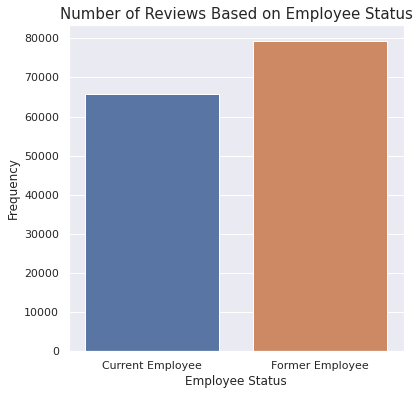

In [58]:
make_count_plot(df['Employee Status'], 'Employee Status', 6, 6)

**Based on Year**

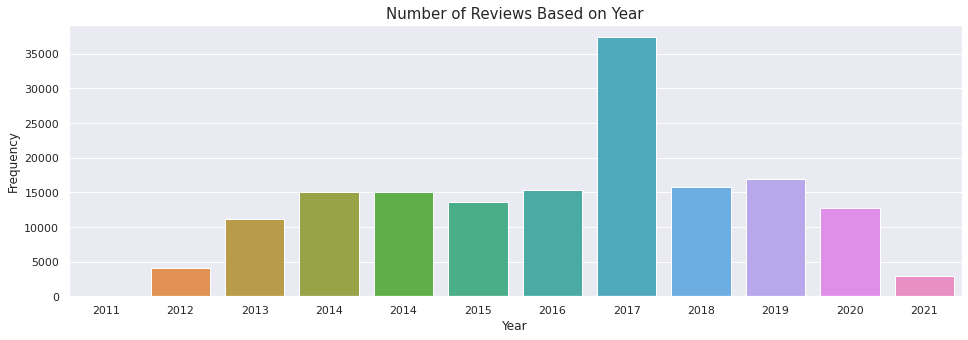

In [59]:
make_count_plot_order(df['Year'], 'Year', 16, 5, valid_year)

**Based on Month**

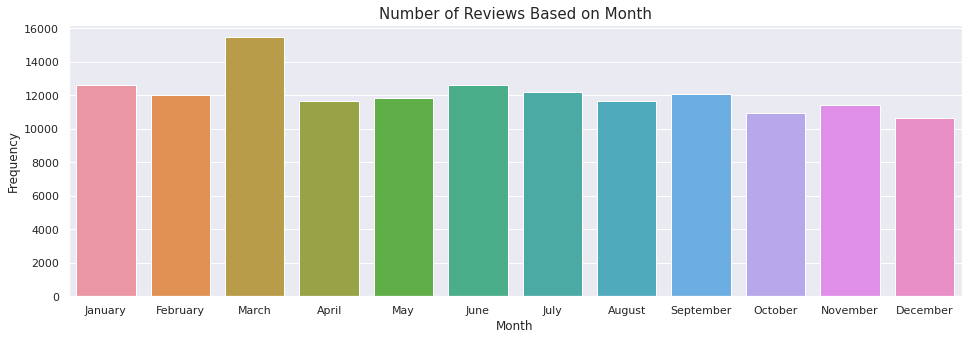

In [60]:
make_count_plot_order(df['Month'], 'Month', 16, 5, valid_month)

**Rating**

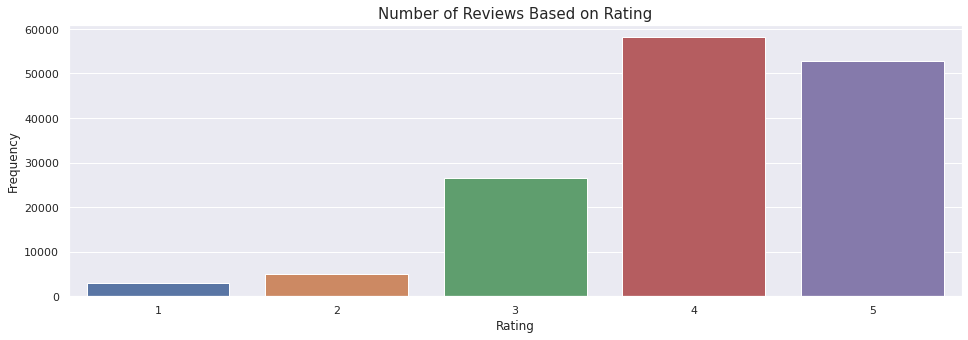

In [61]:
make_count_plot(df['Rating'], 'Rating', 16, 5)

**Company Name**

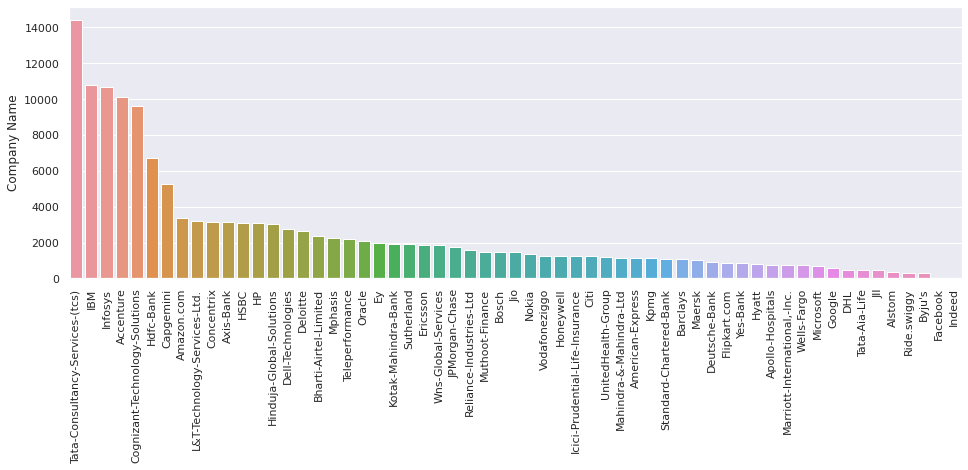

In [62]:
plt.figure(figsize=(16,5))
df_company = df['Company Name'].value_counts()
sns.barplot(x=df_company.index,
            y=df_company)
plt.xticks(rotation=90)
plt.show()

**Rating Based on Employee Status**

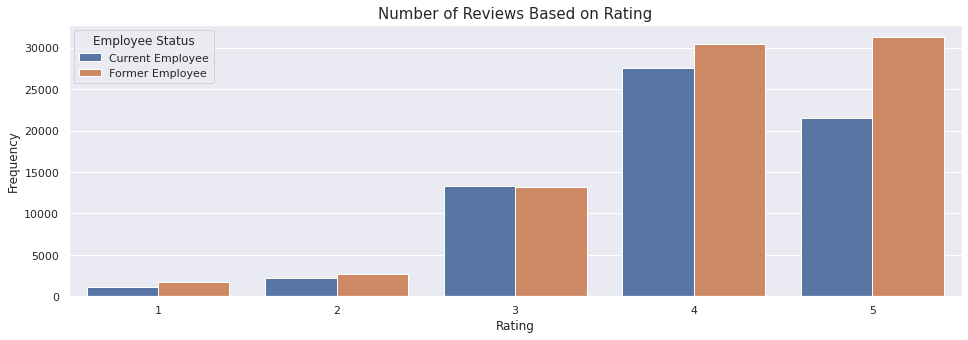

In [63]:
make_count_plot_hue(df['Rating'], 'Rating', 16, 5, hue=df['Employee Status'])

## Build Model

In [64]:
df['Category'] = df['Rating'].replace({1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'})

In [65]:
df = df.reset_index(drop=True)

In [66]:
df.head(3)

,ReviewTitle,CompleteReview,URL,Rating,ReviewDetails,Company Name,Date,Year,Month,Day,Employee Status,Category
0,Productive,"Good company, cool workplace, work load little...",https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Current Employee) - Ghansoli - August 30,...",Reliance-Industries-Ltd,2021-08-30,2021,August,30,Current Employee,Neutral
1,Stressful,1. Need to work on boss's whims and fancies 2....,https://in.indeed.com/cmp/Reliance-Industries-...,3,"(Former Employee) - - August 26, 2021",Reliance-Industries-Ltd,2021-08-26,2021,August,26,Former Employee,Neutral
2,Good Company for Every employee,"Good company for every Engineers dream, Full M...",https://in.indeed.com/cmp/Reliance-Industries-...,5,"(Former Employee) - - August 17, 2021",Reliance-Industries-Ltd,2021-08-17,2021,August,17,Former Employee,Positive


In [67]:
df['Category'].value_counts()

Positive    110796
Neutral      26465
Negative      7788
Name: Category, dtype: int64

In [68]:
df_category = pd.get_dummies(df['Category'])

In [69]:
df_category

,Negative,Neutral,Positive
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
145044,0,0,1
145045,0,0,1
145046,0,0,1
145047,0,1,0


In [70]:
df_new = pd.concat([df['CompleteReview'], df_category], axis=1)

In [71]:
df_new

,CompleteReview,Negative,Neutral,Positive
0,"Good company, cool workplace, work load little...",0,1,0
1,1. Need to work on boss's whims and fancies 2....,0,1,0
2,"Good company for every Engineers dream, Full M...",0,0,1
3,I am just pass out bsc in chemistry Typical da...,0,0,1
4,Not so fun at work just blame games Target pe...,1,0,0
...,...,...,...,...
145044,We get a lot to learn in the company. Very sys...,0,0,1
145045,Lot of scope to learn different technologies u...,0,0,1
145046,"An overall positive experience, nice environme...",0,0,1
145047,Happy that I've started my career from such a ...,0,1,0


## Build Model Without Oversampling

In [72]:
review = df_new['CompleteReview'].values
category = df_new[['Negative', 'Neutral', 'Positive']].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(review, category, test_size=0.2, random_state=0)

In [74]:
tokenizer = Tokenizer(num_words=50000, oov_token='-')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

pad_train = pad_sequences(sequence_train)
pad_test = pad_sequences(sequence_test)

**Callback**

In [75]:
reduce_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.15,
    patience=5,
    min_lr=2.e-5
)

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

**Create Sequential Model**

In [76]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Embedding(input_dim=50000, output_dim=64),
   tf.keras.layers.Dropout(0.4),
   tf.keras.layers.LSTM(64),
   tf.keras.layers.Dropout(0.3),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(3, activation='softmax')
])

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          3200000   
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4

In [78]:
model.compile(
    optimizer='Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [79]:
pad_train.shape[0]

116039

In [80]:
y_train.shape[0]

116039

In [81]:
y_test.shape[0]

29010

In [82]:
history = model.fit(
    pad_train,
    y_train,
    epochs = 30,
    steps_per_epoch = 3867,
    callbacks = [reduce_LR, stop_early],
    validation_data = (pad_test, y_test),
    validation_steps = 967,
    verbose = 1
)

Epoch 1/30
3867/3867 [==============================] - 304s 78ms/step - loss: 0.5917 - accuracy: 0.7737 - val_loss: 0.5714 - val_accuracy: 0.7794
Epoch 2/30
3867/3867 [==============================] - 319s 82ms/step - loss: 0.5476 - accuracy: 0.7859 - val_loss: 0.5760 - val_accuracy: 0.7767
Epoch 3/30
3867/3867 [==============================] - 318s 82ms/step - loss: 0.5205 - accuracy: 0.7953 - val_loss: 0.6380 - val_accuracy: 0.7768
Epoch 4/30
3867/3867 [==============================] - 321s 83ms/step - loss: 0.4887 - accuracy: 0.8093 - val_loss: 0.6309 - val_accuracy: 0.7681
Epoch 5/30
3867/3867 [==============================] - 300s 78ms/step - loss: 0.4599 - accuracy: 0.8207 - val_loss: 0.6312 - val_accuracy: 0.7640
Epoch 6/30
3867/3867 [==============================] - 299s 77ms/step - loss: 0.4318 - accuracy: 0.8350 - val_loss: 0.7233 - val_accuracy: 0.7545
Epoch 7/30
3867/3867 [==============================] - 319s 82ms/step - loss: 0.3848 - accuracy: 0.8539 - val_loss: 0

**Plot Accuracy and Loss**

In [83]:
def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

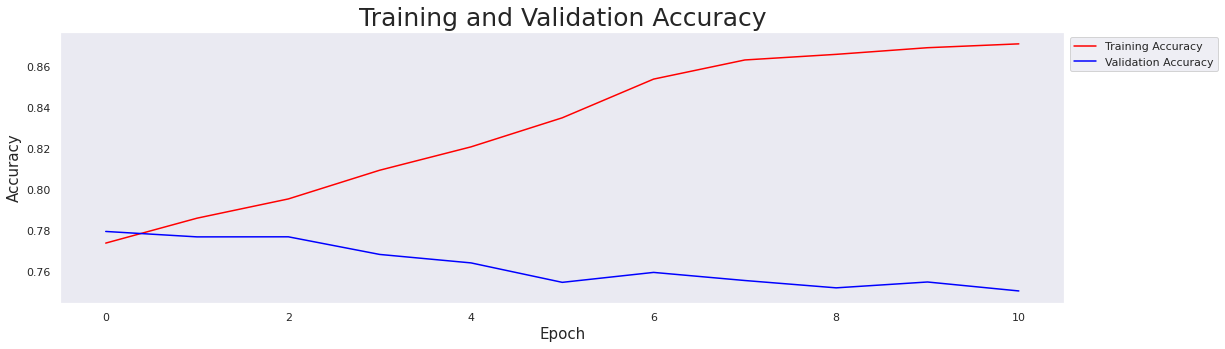

In [84]:
plot_accuracy(history)

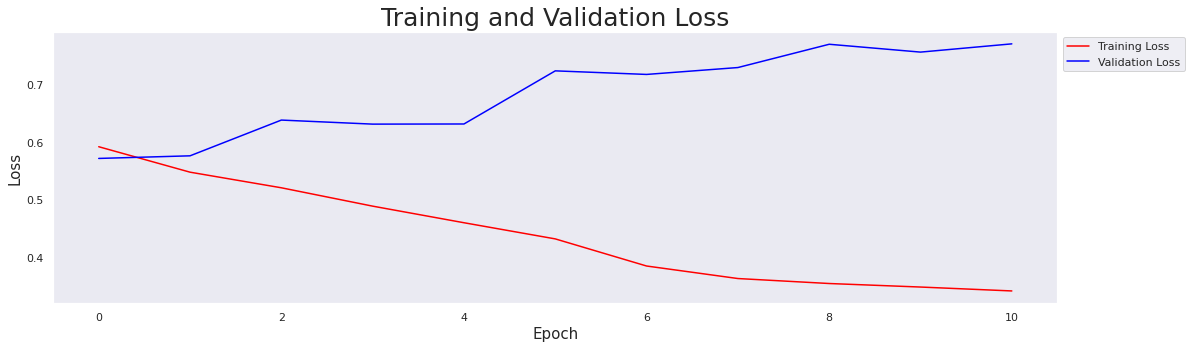

In [85]:
plot_loss(history)

In [88]:
y_pred = model.predict(pad_test)

In [93]:
np.argmax(y_pred,axis=1)

array([2, 2, 2, ..., 2, 1, 2])

In [94]:
np.argmax(y_test, axis=1)

array([2, 1, 1, ..., 2, 2, 2])

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_pred,axis=1), np.argmax(y_test, axis=1))

array([[  449,   225,   104],
       [  455,   815,   667],
       [  727,  4222, 21346]])